# Assignment 1. Traffic volume prediction.
by Anvar Kurmukov,
updated by Bogdan Kirillov, Hekmat Taherinejad, Satyarth Mishra Sharma

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using a public dataset compiling weather information and traffic data continuously monitored in the Twin Cities, Minnesota from 2012 to 2018. The dataset page can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). We've slightly modified it so please download the dataset provided on Canvas.  

You need to download `Metro_Interstate_Traffic_Volume.csv` and place it in the same directory as this notebook.


In [14]:
import numpy as np
import pandas as pd

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `Metro_Interstate_Traffic_Volume.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

If you are using Google Colab, you can upload the file in the cell below. If you are NOT using Colab, set COLAB_P in the cell below to False.

In [15]:
COLAB_P = False
if COLAB_P:
    print("Upload your file, then read it with pd.read_csv()")
    from google.colab import files
    uploaded = files.upload()
    fn = list(uploaded.keys())[0]
    print("File is uploaded to ", fn)
else:
    print("Place your file to the same directory as the notebook, then read your file with pd.read_csv()")

Place your file to the same directory as the notebook, then read your file with pd.read_csv()


In [16]:
import pandas as pd
import numpy as np

In [17]:
# Load the data
#pd.options.display.max_columns = 30

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0
48200,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0
48201,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0
48202,None,282.09,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0


### There is a mistake in this data set. If we have a holiday, then it should be distributed throughout the day. Let's fix it:

In [18]:
mask = df["holiday"] != 'None'
mask.value_counts()
L = len(df.holiday[mask])

In [19]:
mask = df["holiday"] != 'None'
date = df['date_time'][mask].str.split(pat = ' ', expand = True)[0]

for i in np.arange(L):
    
    ind = df['date_time'].str.contains(date.iloc[i])
    start = np.min(np.where(ind))
    stop = np.max(np.where(ind))
    df.loc[start: stop, "holiday"] = df['holiday'][mask].iloc[i]

mask_1 = df['holiday'] != 'None'
mask_1.value_counts()

False    46795
True      1409
Name: holiday, dtype: int64

In [20]:
df.shape

(48204, 9)

In [21]:
# Observe top 10 observations (int)
df.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0
5,None,291.72,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 14:00:00,5181.0
6,None,293.17,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 15:00:00,5584.0
7,None,293.86,0.0,0.0,1.0,Clear,sky is clear,2012-10-02 16:00:00,6015.0
8,None,294.14,0.0,0.0,20.0,Clouds,few clouds,2012-10-02 17:00:00,5791.0
9,None,293.10,0.0,0.0,20.0,Clouds,few clouds,2012-10-02 18:00:00,4770.0


In [22]:
# Observe last 10 observations (int)
df.tail(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48194,None,283.84,0.00,0.0,75.0,Rain,proximity shower rain,2018-09-30 15:00:00,4302.0
48195,None,283.84,0.00,0.0,75.0,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302.0
48196,None,284.38,0.00,0.0,75.0,Rain,light rain,2018-09-30 16:00:00,4283.0
48197,None,284.79,0.00,0.0,75.0,Clouds,broken clouds,2018-09-30 17:00:00,4132.0
48198,None,284.20,0.25,0.0,75.0,Rain,light rain,2018-09-30 18:00:00,3947.0
48199,None,283.45,0.00,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0
48200,None,282.76,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0
48201,None,282.73,0.00,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0
48202,None,282.09,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0
48203,None,282.12,0.00,0.0,90.0,Clouds,overcast clouds,2018-09-30 23:00:00,954.0


In [23]:
# Print all the columns/features names (int)
columns = df.columns
columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [24]:
# Q1.1 How many columns end with a vowel?
# Q1.2 How many columns start with a vowel?
n = 0
k = 0
vowels = ['a', 'e', 'i', 'o', 'u', 'y']
for i in vowels:
    for j in columns:
        if j[-1] == i:
            k+=1
        if j[0] == i:
            n+=1
print("Number of columns end with a vowel (Q1.1): ", k )
print("Number of columns start with a vowel (Q1.2): ", n)

Number of columns end with a vowel (Q1.1):  3
Number of columns start with a vowel (Q1.2):  0


In [25]:
# Q1.3 Which columns are associated with the condition of weather?
columns_wheather = df.columns
print("Columns associated with the condition of weather (Q1.3):", columns_wheather[1:7].tolist())

# Q1.4 How many columns have `th` in their names?
n=0
for j in columns:
    if 'th' in j:
        n+=1      
print("Number of columns have 'th' in the name (Q1.4): ", n)

Columns associated with the condition of weather (Q1.3): ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']
Number of columns have 'th' in the name (Q1.4):  2


In [26]:
# Print data size (int)
print("data size:",df.shape)

# Q2.1 How many observations are in the data?
print("Number of observations (Q2.1):",df.shape[0])

# Q2.2 How many features are in the data?
print("Number of features (Q2.2):",df.shape[1])

data size: (48204, 9)
Number of observations (Q2.1): 48204
Number of features (Q2.2): 9


# 2. Basic data exploration

Lets do some basics:

`.count()` number of not NaN's in every column.
    
Is there any missing values in the data?     
Count number of unique values in every column .nunique().    
What does this tells you about the features, which are most likely categorical and which are most likely numerical?    
Use pandas `.describe()` to display basic statistic about the data.   
Use pandas `.value_counts()` to count number of unique values in a specific column.   
Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.    
Use pandas `.dtypes` field to display data types in columns. 
Hint You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`


In [27]:
# Display number of not NaN's in every column (int)
df.count()
#Number of NaN's
df.shape[0] - df.count()

holiday                0
temp                   1
rain_1h                1
snow_1h                0
clouds_all             3
weather_main           1
weather_description    3
date_time              0
traffic_volume         5
dtype: int64

In [28]:
# Q3.2 How many NA values are in the `temp` column?
print("Number of Na values in the 'temp' column (Q3.2):", df['temp'].isna().value_counts()[1])

# Q3.4 How many NA values are in the `snow_1h` column?
print("Number of Na values in the 'snow_1h' column (Q3.4):", len(df) - df['snow_1h'].isna().value_counts()[0])

Number of Na values in the 'temp' column (Q3.2): 1
Number of Na values in the 'snow_1h' column (Q3.4): 0


In [29]:
# Now drop rows with NaN with `.dropna`. Remeber to either reassign your dataframe or provide `inplace=True` argument.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0
...,...,...,...,...,...,...,...,...,...
48185,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0
48186,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0
48187,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0
48188,None,282.09,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0


In [30]:
# Display basic data statistics using .describe()
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48190.000000,48190.000000,48190.000000,48190.000000,48190.000000
mean,281.201366,0.334356,0.000222,49.369267,3259.859079
std,13.337406,44.795638,0.008169,39.016127,1986.972809
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1192.250000
50%,282.440000,0.000000,0.000000,64.000000,3380.000000
75%,291.800000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [31]:
# Count number of unique values in every column (int)
df.nunique()

holiday                   12
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40562
traffic_volume          6704
dtype: int64

In [32]:
np.unique(df['holiday'], return_counts = True )

(array(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
        'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day',
        'None', 'State Fair', 'Thanksgiving Day', 'Veterans Day',
        'Washingtons Birthday'], dtype=object),
 array([  131,   112,   126,   157,   107,   134,   131, 46781,   120,
          135,   120,   136], dtype=int64))

In [33]:
# Q4.1 How many unique values are in the `clouds_all` column?
print("Number of unique values in the `clouds_all` column (Q4.1):", df['clouds_all'].nunique())

# Q4.3 How many unique values are in the `weather_description` column?
print("Number of unique values in the `weather_description` column (Q4.3):", df['weather_description'].nunique())

Number of unique values in the `clouds_all` column (Q4.1): 60
Number of unique values in the `weather_description` column (Q4.3): 38


In [34]:
# Count frequency of the values in different columns (list of ints in ascending order)
# You could select a column using same syntax as for selecting a key from a dictionary: `data[colname]`
# numpy's `unique` function can be useful for this task

# Q5.1 For every unique `weather_main` value give its number of occurences.
# df.nunique()
frequency_5_1 = (df['weather_main'].value_counts().sort_values(ascending=True)).to_list()
print("List of the number of occurences for every unique `weather_main` value (Q5.1):", frequency_5_1, "\n")

# Q5.2 For every unique `weather_description` value give its number of occurences.
frequency_5_2 = (df['weather_description'].value_counts().sort_values(ascending=True)).to_list()
print("List of the number of occurences for every unique `weather_description` value (Q5.2):", frequency_5_2)

List of the number of occurences for every unique `weather_main` value (Q5.1): [4, 20, 912, 1034, 1359, 1821, 2876, 5671, 5950, 13384, 15159] 

List of the number of occurences for every unique `weather_description` value (Q5.2): [1, 2, 2, 3, 4, 6, 6, 11, 13, 13, 15, 18, 20, 37, 52, 54, 63, 64, 125, 136, 293, 467, 616, 651, 673, 912, 1100, 1359, 1664, 1726, 1946, 1955, 3371, 3458, 4665, 5081, 5950, 11658]


In [35]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)

# Q6.2 What are the max, min, mean and the std of the `clouds_all` column?
# print(df['clouds_all'].describe())
list_6_2 = df['clouds_all'].agg(['max', 'min', 'mean', 'std']).to_list()
print("Statistics for `clouds_all` column (Q6.2):", list(np.around(np.array(list_6_2),3)))

# Q6.4 What are the max, min, mean and the std of the `rain_1h` column?
# print(df['rain_1h'].describe())
list_6_4 = df['rain_1h'].agg(['max', 'min', 'mean', 'std']).to_list()
print("Statistics for `rain_1h` column (Q6.4):", list(np.around(np.array(list_6_4),3)))

Statistics for `clouds_all` column (Q6.2): [100.0, 0.0, 49.369, 39.016]
Statistics for `rain_1h` column (Q6.4): [9831.3, 0.0, 0.334, 44.796]


In [36]:
# Display data types of all columns (int)

# Q7.3 How many columns have `float64` data type?
print("Number of columns that have 'float64' data type (Q7.3):", len(df.select_dtypes(include='float').columns))

# Q7.4 What are the columns with dtype == `float64`?
print("Names of columns with 'float64' dtype (Q7.4):", df.select_dtypes(include='float').columns.tolist())

Number of columns that have 'float64' data type (Q7.3): 5
Names of columns with 'float64' dtype (Q7.4): ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']


# 3. Data selection

In pandas.DataFrame you could select

  Row/s by position (integer number [0 .. number of rows - 1]) .iloc or by DataFrame.index .loc:   

```
  data.loc[0]  
  data.loc[5:10]  
  data.iloc[0]  
  data.iloc[5:10]   
```

Though, this is probably the worst way to manipulate rows.   
  Columns by name

```
  data[columname]
```

  Row/s and columns

```
  data.loc[10, columname]  
  data.iloc[10, columname]  
```

Using boolean mask

```
  mask = data[columname] > value  
  data[mask]  
```

You could combine multiple conditions using & or | (and, or)   

```
cond1 = data[columname1] > value1  
cond2 = data[columname2] > value2  
data[cond1 & cond2]  
```

Using queries .query():  

```
value = 5 
data.query("columname > value")  
```

You could combine multiple conditions using and, or  

```
data.query("(columname1 > value1) and (columname2 > value2)")
```

and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

Remember to use different quotation marks " or ' for columnname inside a query.


In [37]:
# Select rows by position (int)

# Q8.1 What is the temperature of the time slot with index 777?
print("Temperature of the time slot with index 777 (Q8.1):", df.loc[777, 'temp'])

# Q8.3 How much is cloud coverage with index 1337?
print("Cloud coverage with index 1337 (Q8.3):", df.loc[1337, 'clouds_all'])

Temperature of the time slot with index 777 (Q8.1): 278.5
Cloud coverage with index 1337 (Q8.3): 1.0


In [38]:
# Select rows by index (int)

#Q9.4 What is the weather main of the time slot from index 252?
print("Q9.4")
print(df['weather_main'].iloc[252:])

# Q9.5 When was the time slot with index of 38 captured?
print("Q9.5:",df['date_time'].iloc[38])

Q9.4
252             Clear
253             Clear
254             Clear
255            Clouds
256             Clear
             ...     
48185          Clouds
48186          Clouds
48187    Thunderstorm
48188          Clouds
48189          Clouds
Name: weather_main, Length: 47938, dtype: object
Q9.5: 2012-10-04 03:00:00


In [39]:
# Using mask or .query syntax select rows/columns (int)

#Q10.2 When was the first "light intensity drizzle" in weather description captured?
mask = df["weather_description"] == "light intensity drizzle" 
print("The first capture of 'light intensity drizzle (Q10.2)':", df["date_time"][mask].iloc[0])

#Q10.4 How many time slots are foggy? (weather_main = Fog)
mask = df["weather_main"] == "Fog"
print("Number of foggy slots (Q10.4):", len(df["weather_main"][mask]))

The first capture of 'light intensity drizzle (Q10.2)': 2012-10-10 07:00:00
Number of foggy slots (Q10.4): 912


In [40]:
# Q11.3 How much cloud coverage percentage were in sky on October 16th 2012 at 19:00?
mask = df["date_time"] == '2012-10-16 19:00:00'
print("Q11.3:",int(df["clouds_all"][mask]))

# Q11.5 What is the "weather_description" in the 20th "weather_main" with Thunderstorm?
mask = df["weather_main"] == "Thunderstorm"
print("Q11.5:", df["weather_description"][mask].iloc[19])

Q11.3: 68
Q11.5: proximity thunderstorm


In [41]:
# Q12.1 What is the temperature of the tenth holiday?
mask = df['holiday'] != "None"
print("Q12.1:", df["temp"][mask].iloc[9])

#CLARIFY

# Q12.5 What is the temperature of 1337-th time slot with clear sky (clouds_all <= 20)?
value = 20
mask = df["clouds_all"] <= value
print("Q12.5:", df["temp"][mask].iloc[1336])

Q12.1: 273.71
Q12.5: 276.63


In [42]:
#An example for me
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total
# df['sum'] = df[["temp", 'clouds_all', 'snow_1h']].apply(_sum, axis=1)
# df['sum'] = df[["temp", 'clouds_all', 'snow_1h']].apply(sum, axis=1)
# df['sum'] = df[["temp", 'clouds_all', 'snow_1h']].apply(lambda x: x[0]+x[1]+x[2], axis=1)
# df['sum'];

# 4. Creating new columns

Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. Typically, you would compute something new based on existing data and save it in a new column. For example one might want to sum a number of existing columns:
```
data['sum'] = data[col1] + data[col2] + ...
```
Pandas also provides another powerfull tool: .apply, .map(), .applymap() methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas . They allow you to apply some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of sum using .apply():
```
data['sum'] = data[[col1, col2, col3]].apply(sum, axis=1)
```
you are not restricted to existent functions, .apply() accepts any function (including lambda functions):
```
data['sum'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total

data['sum'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has axis parameter axis=0 refers to rows, axis=1 refers to columns.

Warning. You should never use for loops to sum numerical elements from the container.

In [43]:
# Create new columns using the old ones (new column in your DataFrame)

# Q13.1 Create a `temp_in_celcius` column from the existing `temp` (kelvin) using any method above
df['temp_in_celcius'] = df['temp'] - 273

# Q13.2 Create a new bool column `hot` which indicates whether the time slot was hot (temp > 300)
mask = df['temp'] > 300
df['hot'] = mask

# Q13.3 Create a new bool column `rainy_and_cloudy` which indicates whether it was rainy (>0.1) AND cloudy (>50)
cond_1 = df['rain_1h'] > 0.1
cond_2 = df['clouds_all'] > 50
df['rainy_and_cloudy'] = cond_1 & cond_2 

# Q13.4 Create a new bool column `is_holiday` which indicates whether the day of the time slot falls on any holiday
mask = df['holiday'] != "None"
df['is_holiday'] = mask

# Q13.5 Create a new column `traffic_cat` by splitting a `traffic_volume` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.

df['traffic_cat'] = pd.qcut(df['traffic_volume'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [1, 2, 3, 4, 5])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_in_celcius,hot,rainy_and_cloudy,is_holiday,traffic_cat
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,15.28,False,False,False,5
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,16.36,False,False,False,4
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,16.58,False,False,False,4
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,17.13,False,False,False,4
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,18.14,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48185,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0,10.45,False,False,False,3
48186,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0,9.76,False,False,False,3
48187,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0,9.73,False,False,False,2
48188,None,282.09,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 22:00:00,1450.0,9.09,False,False,False,2


In [44]:
# Using mask or .query syntax select rows/columns (int).
# For working with dates, define helper functions that operate on the date_time string.

# Q14.1 How many cloudy time slots were captured in autumn 2016? Including both start and end day.

mask = df["weather_main"] == "Clouds"
    
start = '2016-09-01 00:00:00'
end ='2016-11-30 23:00:00'
idx_start = np.where(df['date_time'] == start)[-1][-1]
idx_end = np.where(df['date_time'] == end)[-1][-1]

df_autumn = df.loc[idx_start:idx_end]
print("Q14.1:", len(df_autumn["weather_main"][mask]))
mask
# Q14.2 How many rainy time slots that were captured in the fall, with traffic volume more than 2000?
cond_1 = df_autumn['weather_main'] == "Rain"
cond_2 = df['traffic_volume'] > 2000
mask = cond_1 & cond_2
print("Q14.2:", len(df_autumn[mask]))

Q14.1: 643
Q14.2: 259


C:\Users\Nikolay\AppData\Local\Temp\ipykernel_2608\3238735770.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Q14.2:", len(df_autumn[mask]))


In [45]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)

# Q15.2 What was the traffic volume of the coldest time slot of the year 2016?

df_coldest = df[df['temp'] != 0] #remove temperature -273
# df_coldest
df_coldest.reset_index(drop=True, inplace=True)
df_coldest['temp'].min()
ind = np.where(df_coldest['temp'] == df_coldest['temp'].min())[-1][-1]
print("Q15.2:", df_coldest['traffic_volume'][ind])

# Q15.3 What was the traffic volume of the highest amount of snow in one hour?
df['snow_1h'].max()
ind_1 = np.where(df['snow_1h'] == df['snow_1h'].max())[-1][0]
ind_2 = np.where(df['snow_1h'] == df['snow_1h'].max())[-1][-1]
df.reset_index(drop=True, inplace=True)
df['traffic_volume'][ind_1]
df['traffic_volume'][ind_2]
print('Q15.3:', df['traffic_volume'][ind_1], "; ", df['traffic_volume'][ind_2])

Q15.2: 1462.0
Q15.3: 5167.0 ;  888.0


In [46]:
# Using mask or .query syntax select rows/columns (float)

# Q16.1 What is the average temperature in celcius of the time slots with rainy_and_cloudy=True?
mask = df['rainy_and_cloudy']
print("Q16.1:", df['temp_in_celcius'][mask].mean())

# Q16.2 What is the average traffic volume on holidays?
mask = df['is_holiday']
print("Q16.2:", df['traffic_volume'][mask].mean())
 
# Q16.3 What is the average traffic volume on non-holidays?
mask = df['is_holiday'] != True
df['traffic_volume'][mask].mean()
print("Q16.3:", df['traffic_volume'][mask].mean())

# Q16.4 What is the average traffic volume in the highest quantile?
mask = df['traffic_cat'] == 5
print("Q16.4:", df['traffic_volume'][mask].mean())

# Q16.5 What is the average traffic volume in the lowest quantile?
mask = df['traffic_cat'] == 1
print("Q16.5:", df['traffic_volume'][mask].mean())

Q16.1: 13.734578809434668
Q16.2: 2541.4371894960964
Q16.3: 3281.497274534533
Q16.4: 5870.913350649351
Q16.5: 485.5536195809998


# 5. Basic date processing

You figure out that column date is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method to_datetime() to convert the date to a good format.
- Extract year, month, day and weekday from your new date column. Save them to separate columns.
- How many columns has your data now?
- Drop column date, remember to set inplace parameter to True.

Hint: for datetime formatted date you could extract the year as follow:
```
data.date.dt.year
```
Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like black friday.

Learn how to work with date in Python!


In [47]:
# Create new columns based on `Captured` column

# Q17.2 Extract and store `year`
df["year"] = pd.to_datetime(df['date_time']).dt.year

# Q17.5 Extract and store `weekday` (Monday - 0, Sunday - 6)
df["weekday"] = pd.to_datetime(df['date_time']).dt.dayofweek

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_in_celcius,hot,rainy_and_cloudy,is_holiday,traffic_cat,year,weekday
0,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,15.28,False,False,False,5,2012,1
1,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,16.36,False,False,False,4,2012,1
2,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,16.58,False,False,False,4,2012,1
3,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,17.13,False,False,False,4,2012,1
4,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,18.14,False,False,False,4,2012,1


In [48]:
# Find some date related information from the data (int)

# Q18.1 What is the weekday with the highest traffic volume?
mask = df["traffic_volume"] == df['traffic_volume'].max()
print("Q18.1:", int(df['weekday'][mask]))
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# weekdays[ind]

# Q18.4 What is the average traffic volume in the time period between 15-19 hours
start = 15
end = 19

time_period = pd.to_datetime(df['date_time']).dt.hour.between(start, end)
print("Q18.4:", df['traffic_volume'][time_period].mean())

Q18.1: 3
Q18.4: 4749.295714285714


# 6. Groupby

from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric.

Instead of computing average traffic volume with for each month you could compute average traffic volumes for every month in a single command:
```
data.groupby('month')['traffic_volume'].mean()
```
You could also make multi-column groups:
```
data.groupby(['weekday','month'])['traffic_volume'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','month'])['traffic_volume'].agg([min, max])
```
instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['weekday','month'])['traffic_volume'].apply(lambda x: np.quantile(x, .5))
```
and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['month'])['traffic_volume'].median()
data['gp_feature'] = data['month'].map(gp)
```
Now, if some timeslot has month == 2, its gp_feature will be equal to the median traffic volume amongst all observations in February

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [49]:
# # Create some groupby features

# Q19.1 `traffic_by_year` groupby `year` and compute median traffic volume.
print("Q19.1:")
print(df.groupby('year')['traffic_volume'].median())

# Q19.2 `traffic_by_weekday` groupby `weekday` and compute median traffic volume.
print("Q19.2:")
print(df.groupby('weekday')['traffic_volume'].median())

# Q19.3 `temperature_by_traffic` groupby `traffic_cat` and compute average temperature in celsius.
print("Q19.3:")
print(df.groupby('traffic_cat')['temp_in_celcius'].mean())

Q19.1:
year
2012    3225.0
2013    3344.0
2014    3316.0
2015    3368.0
2016    3258.5
2017    3530.0
2018    3400.0
Name: traffic_volume, dtype: float64
Q19.2:
weekday
0    3619.0
1    4070.0
2    4315.0
3    4280.0
4    4336.5
5    3003.0
6    2260.0
Name: traffic_volume, dtype: float64
Q19.3:
traffic_cat
1    5.595774
2    6.181004
3    9.394710
4    9.947489
5    9.890191
Name: temp_in_celcius, dtype: float64


# 7. Building a regression model

- You do not need to normalize data for tree models, and for linear/knn models this step is essential.
- Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.
- You may create or drop any features you want - try to only keep features which you think will be relevant to the prediction of traffic volume.



In [50]:
# Q20 Separate your data into inputs and targets, keeping only relevant inputs. Drop any features computed from the output eg. `traffic_cat`
Y = df["traffic_volume"].values # target that we need to predict

df["month"] = pd.to_datetime(df['date_time']).dt.month
df["hour"] = pd.to_datetime(df['date_time']).dt.hour

good_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'month', 'weekday', 'hour'] #todo
Xdf_ = df[good_columns] #input
Xdf_

,temp,rain_1h,snow_1h,clouds_all,month,weekday,hour
0,288.28,0.0,0.0,40.0,10,1,9
1,289.36,0.0,0.0,75.0,10,1,10
2,289.58,0.0,0.0,90.0,10,1,11
3,290.13,0.0,0.0,90.0,10,1,12
4,291.14,0.0,0.0,75.0,10,1,13
...,...,...,...,...,...,...,...
48185,283.45,0.0,0.0,75.0,9,6,19
48186,282.76,0.0,0.0,90.0,9,6,20
48187,282.73,0.0,0.0,90.0,9,6,21
48188,282.09,0.0,0.0,90.0,9,6,22


In [51]:
# convert categorical features
from sklearn.preprocessing import OneHotEncoder

cat_features = ['month', 'weekday', 'hour']
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[cat_features]))
encoded_features = pd.DataFrame(ohe.fit_transform(df[cat_features]))

# Rename these encoded features
Month_cols = [ f'month_{col}' for col in ohe.categories_[0] ]
Weekday_cols = [f'weekday_{col}' for col in ohe.categories_[1]]
Hour_cols = [f'hour_{col}' for col in ohe.categories_[2]]

encoded_features.columns = [*Month_cols, *Weekday_cols, *Hour_cols]
# Add into Data Frame
Xdf = pd.concat([Xdf_,encoded_features], axis = 1)
pd.options.display.max_columns = 50

Xdf.drop(['month', 'weekday', 'hour'], axis=1, inplace=True)

Now it's time to split our data into train and test sets. Generally a random split is used, but one needs to be very careful with time series data - we need to make sure train and test data don't contain mixed adjacent time slots. In general with time series, it is recommended not to predict values from the past using input information from the future (although the applicability of this rule in our case is debatable), so we'll use sklearn's [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) class here. TimeSeriesSplit splits data into a number of folds, then only provides data from past folds to train a model tested on the currently considered fold. So if we split our data into five parts, we'll get four folds:

1. Train on [0], test on [1]
2. Train on [0,1], test on [2]
3. Train on [0, 1, 2], test on [3]
4. Train on [0, 1, 2, 3], test on [4]

For the following tasks, you are required to use train and test indices from the last fold provided by TimeSeriesSplit with `n_splits` = 5.

In [52]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Q21 Split your data into train and test parts.
# How many records (rows) do you have in train and test tables? (list of int)?
# Use sklearn.model_selection.TimeSeriesSplit with n_splits=5

from sklearn.model_selection import TimeSeriesSplit


t = TimeSeriesSplit(n_splits=5)

train_size = []
test_size = []
n=1
for train_idx, test_idx in t.split(Xdf):
    print("Fold", str(n), ",", "train_size =", train_idx.size, ", test_size =", test_idx.size)   
    n+=1
    train_size.append(train_idx.size)
    test_size.append(test_idx.size)
    
print("\nNumber of records in train table:", train_size)
print("\nNumber of records in test table:", test_size)

Fold 1 , train_size = 8035 , test_size = 8031
Fold 2 , train_size = 16066 , test_size = 8031
Fold 3 , train_size = 24097 , test_size = 8031
Fold 4 , train_size = 32128 , test_size = 8031
Fold 5 , train_size = 40159 , test_size = 8031

Number of records in train table: [8035, 16066, 24097, 32128, 40159]

Number of records in test table: [8031, 8031, 8031, 8031, 8031]


In [54]:
X_train, X_test, y_train, y_test  = Xdf.iloc[train_idx], Xdf.iloc[test_idx], Y[train_idx], Y[test_idx]

In [55]:
# normalize numerical features
from sklearn.preprocessing import MinMaxScaler

num_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']

scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_2608\3624041685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\Nikolay\AppData\Local\Temp\ipykernel_2608\3624041685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_features] = scaler.transform(X_test[num_features])


lm_reg r2 score: 0.8262419888047843

lm_reg: PearsonRResult(statistic=0.909498753689447, pvalue=0.0)

tree_reg r2 score: 0.8857231959035311

tree_reg: PearsonRResult(statistic=0.943263561704518, pvalue=0.0)

knn_reg r2 score: 0.9292868355447499

knn_reg: PearsonRResult(statistic=0.9646566149580706, pvalue=0.0)



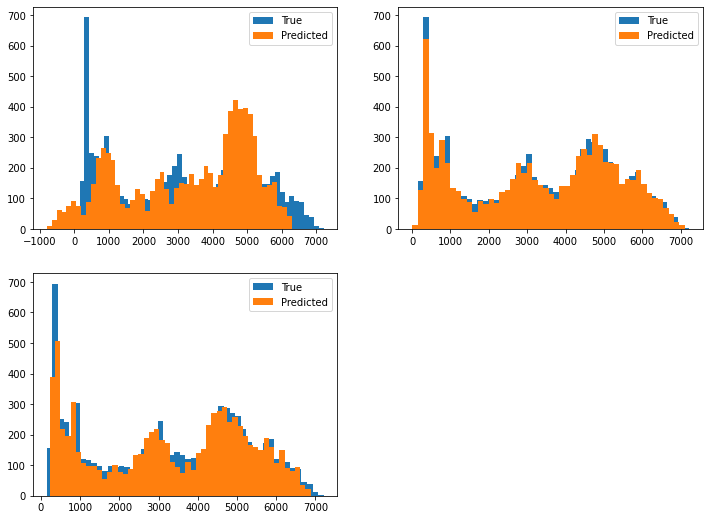

In [57]:
# Create a predictive regression model of a traffic volume.

# Q22.1 Use linear regression with l2 regularization (Ridge regression)
# Q22.2 Use decision tree regression
# Q22.3 Use k nearest neighbours regression

from sklearn.metrics import r2_score

lm = Ridge()
dt = DecisionTreeRegressor()
KN = KNeighborsRegressor()

for model in [lm, dt, KN]:
    
    model.fit(X_train, y_train)

n = 1
fig = plt.figure(figsize=(12, 9))
for model_name, model in zip(['lm_reg', 'tree_reg', 'knn_reg'], [lm, dt, KN]):
    
    print(f'{model_name} r2 score: {r2_score(y_test, model.predict(X_test))}')
    print()
   
    plt.subplot(2, 2, n)
    plt.hist(y_test, bins=50, label='True');
    plt.hist(model.predict(X_test), bins=50, label='Predicted')
    plt.legend();    
    print(f'{model_name}: {pearsonr(y_test, model.predict(X_test))}')
    print()
    n+=1

In [58]:
# Use grid search to select optimal hyperparamters of your models.
# Compute train and test mean squared error for your best models (list of float).
# Compute train and test R^2 for your best models (list of float).
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Q23.1 Alpha for a ridge regression

params_grid = [{'alpha':
               np.exp(np.linspace(np.log(1e-8), 0, 9))
}]

gs = GridSearchCV(lm, param_grid = params_grid, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Ridge(),
             param_grid=[{'alpha': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00])}],
             verbose=1)

In [59]:
# Q24.1 Train, test MSE using linear regression with l2 regularization
# Q25.1 Train, test R^2 using linear regression with l2 regularization

lm_new = Ridge(alpha=gs.best_params_['alpha']) 
lm_new.fit(X_train, y_train)

y_lm_new_pred_test = lm_new.predict(X_test)
y_lm_new_pred_train = lm_new.predict(X_train)

printmd("**L2 regularization**")

print("Train MSE:", mean_squared_error(y_train, y_lm_new_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_lm_new_pred_test))
print()

print("Test R2:", round(r2_score(y_test, y_lm_new_pred_test),3))
print("Train R2:", round(r2_score(y_train, y_lm_new_pred_train),3))

**L2 regularization**

Train MSE: 657024.925600616
Test MSE: 673981.8143031427

Test R2: 0.826
Train R2: 0.834


In [60]:
# Q23.2 Depth for the tree

params_grid = [{'max_depth':
               np.arange(2, 20)
}]

gs = GridSearchCV(dt, param_grid = params_grid, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])}],
             verbose=1)

In [61]:
# Q24.2 Train, test MSE using decision tree regression
# Q25.2 Train, test R^2 using decision tree regression

dt_new = DecisionTreeRegressor(max_depth=gs.best_params_['max_depth']) 
dt_new.fit(X_train, y_train)

y_dt_new_pred_test = dt_new.predict(X_test)
y_dt_new_pred_train = dt_new.predict(X_train)

printmd("**DecisionTreeRegressor**")

print("Train MSE:", mean_squared_error(y_train, y_dt_new_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_dt_new_pred_test))
print()

print("Test R2:", round(r2_score(y_test, y_dt_new_pred_test),3))
print("Train R2:", round(r2_score(y_train, y_dt_new_pred_train),3))

**DecisionTreeRegressor**

Train MSE: 232505.1562994301
Test MSE: 314886.63546216424

Test R2: 0.919
Train R2: 0.941


In [62]:
# Q23.3 Number of neighbours for the knn

params_grid = [{'n_neighbors':
               np.arange(1, 20)
}]

gs = GridSearchCV(KN, param_grid = params_grid, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
             verbose=1)

In [63]:
# Q24.3 Train, test MSE using k nearest neighbours regression
# Q25.3 Train, test R^2 using k nearest neighbours regression

KN_new = KNeighborsRegressor(n_neighbors=gs.best_params_['n_neighbors']) 
KN_new.fit(X_train, y_train)

y_KN_new_pred_test = KN_new.predict(X_test)
y_KN_new_pred_train = KN_new.predict(X_train)

printmd("**KNeighborsRegressor**")

print("Train MSE:", mean_squared_error(y_train, y_KN_new_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_KN_new_pred_test))
print()

print("Test R2:", round(r2_score(y_test, y_KN_new_pred_test),3))
print("Train R2:", round(r2_score(y_train, y_KN_new_pred_train),3))

**KNeighborsRegressor**

Train MSE: 199746.0925959806
Test MSE: 261276.8649016054

Test R2: 0.933
Train R2: 0.95


In [64]:
# Q26 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).
data = {'Feature': Xdf.columns, 'Number': abs(lm.coef_)}
df = pd.DataFrame(data=data).sort_values(by=['Number', 'Feature'])
df
print(['rain_1h', 'snow_1h', 'clouds_all', 'month', 'weekday'])

['rain_1h', 'snow_1h', 'clouds_all', 'month', 'weekday']


# Make sure your .ipynb is linearly executable     
# Kernel -> Restart & Run All -> No ERROR cells